In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from data_loader.load_data import ImagesLoader

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, \
                            confusion_matrix, \
                            ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **CARREGANDO OS DADOS**

In [7]:
loader = ImagesLoader(train_images_path='../data/simpsons-small-balanced/train/',
                      test_images_path='../data/simpsons-small-balanced/test/')

data = loader.load_data()

+ 'names_files' loaded
+ 'names_paths' loaded
+ 'names_characters' loaded
+ 'names_encoded' loaded
+ 'images_original' loaded
+ 'images_resized' loaded
+ 'images_gray' loaded
+ 'images_blue' loaded
+ 'images_green' loaded
+ 'images_red' loaded
+ 'images_hsv' loaded
+ 'images_h' loaded
+ 'images_s' loaded
+ 'images_v' loaded
+ 'images_lbp' loaded
+ 'images_hu' loaded
+ 'images_gabor' loaded
+ 'images_hog' loaded
+ 'descriptor_blue' loaded
+ 'descriptor_green' loaded
+ 'descriptor_red' loaded
+ 'descriptor_rgb' loaded
+ 'descriptor_h' loaded
+ 'descriptor_s' loaded
+ 'descriptor_v' loaded
+ 'descriptor_hsv' loaded
+ 'descriptor_lbp' loaded
+ 'descriptor_hu' loaded
+ 'descriptor_gabor' loaded
+ 'descriptor_hog' loaded
+ 'combination_rgb+hsv' loaded
+ 'combination_rgb+hsv+lbp' loaded
+ 'combination_rgb+hsv+hu' loaded
+ 'combination_rgb+hsv+hog' loaded
+ 'combination_rgb+hsv+lbp+hu' loaded
+ 'combination_rgb+hsv+lbp+hog' loaded
+ 'combination_rgb+hsv+hu+hog' loaded
+ 'combination_rgb+hsv+lb

In [8]:
print('names_characters')
print(np.array(data['names_characters']['train']).shape,
      np.array(data['names_characters']['test']).shape, end='\n\n')

print('images_gray')
print(np.array(data['images_gray']['train']).shape,
      np.array(data['images_gray']['test']).shape)

names_characters
(324,) (95,)

images_gray
(324, 315, 390) (95, 315, 390)


# **TRAIN-TEST SPLIT**

In [9]:
X_train = np.array(data['images_gray']['train']).astype('float64')
y_train = np.array(data['names_encoded']['train']).astype('float64')

X_test = np.array(data['images_gray']['test']).astype('float64')
y_test = np.array(data['names_encoded']['test']).astype('float64')

X_train.shape, X_test.shape

((324, 315, 390), (95, 315, 390))

# **CRIAÇÃO E AVALIAÇÃO DO MODELO**

In [10]:
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.models import Model

In [12]:
shape = data['images_gray']['train'][0].shape
N_CLASSES = 5

input_img = layers.Input(shape=shape)

model = layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu')(input_img)
model = layers.BatchNormalization()(model)
model = layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(model)
model = layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(model)
model = layers.BatchNormalization()(model)
model = layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(model)
model = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(model)
model = layers.BatchNormalization()(model)
model = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(model)
model = layers.BatchNormalization()(model)
model = layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(model)
model = layers.BatchNormalization()(model)
model = layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(model)

model = layers.Flatten()(model)
model = layers.Dense(4096, activation='relu')(model)
model = layers.Dropout(0.5)(model)
model = layers.Dense(4096, activation='relu')(model)
model = layers.Dropout(0.5)(model)
model = layers.Dense(N_CLASSES, activation='softmax')(model)
model = Model(inputs=[input_img], outputs=[model])

model.build((1, 315, 390))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 315, 390)

In [7]:
early_stopping = EarlyStopping(monitor='loss', patience=2)

model.fit(
    X_train,
    y_train,
    epochs=80,
    batch_size=80,
    callbacks=[early_stopping]
)

Epoch 1/80
4/4 [==============================] - 3s 353ms/step - loss: 36963.6523
Epoch 2/80
4/4 [==============================] - 1s 362ms/step - loss: 50775.3594
Epoch 3/80
4/4 [==============================] - 1s 325ms/step - loss: 36513.1953
Epoch 4/80
4/4 [==============================] - 1s 323ms/step - loss: 27383.8516
Epoch 5/80
4/4 [==============================] - 1s 321ms/step - loss: 25841.9785
Epoch 6/80
4/4 [==============================] - 1s 327ms/step - loss: 22304.5449
Epoch 7/80
4/4 [==============================] - 1s 331ms/step - loss: 15507.2041
Epoch 8/80
4/4 [==============================] - 1s 325ms/step - loss: 8050.2466
Epoch 9/80
4/4 [==============================] - 1s 318ms/step - loss: 3831.4893
Epoch 10/80
4/4 [==============================] - 1s 311ms/step - loss: 3865.8093
Epoch 11/80
4/4 [==============================] - 1s 326ms/step - loss: 4790.1416


In [8]:
test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred[0]

4/4 [==============================] - 0s 41ms/step


array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [9]:
decoded_labels = {value: key for value, key in zip(list(loader.encoded_labels.values()),
                                                   list(loader.encoded_labels.keys()))}

In [10]:
y_pred = np.array([np.argmax(i) for i in y_pred])

print(classification_report([decoded_labels[i] for i in y_test],
                            [decoded_labels[i] for i in y_pred]))

              precision    recall  f1-score   support

        bart       0.17      0.06      0.09        35
      family       0.00      0.00      0.00        11
       homer       0.00      0.00      0.00        25
        lisa       0.13      0.92      0.22        13
      maggie       0.00      0.00      0.00        12
       marge       0.00      0.00      0.00        10

    accuracy                           0.13       106
   macro avg       0.05      0.16      0.05       106
weighted avg       0.07      0.13      0.06       106



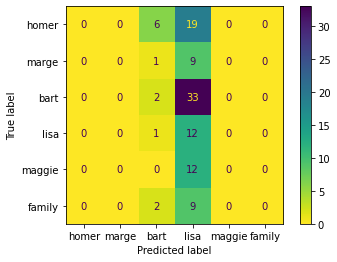

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=loader.labels)
cm_plot.plot(cmap='viridis_r');